In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../input/eeg-signal-processing/EEG_Clean_Data.csv')
df.head()

,EEG _mean(),EEG _std(),EEG _mad(),EEG _max(),EEG _min(),EEG _energy(),EEG _iqr(),EEG _entropy(),EEG _mean().1,EEG _std().1,...,EEG _std().2,EEG _mad().2,EEG _max().2,EEG _min().2,EEG _iqr().2,EEG _entropy().2,EEG _skewness().1,EEG _kurtosis().1,state,subject
0,52.430,258.690733,330.620295,556,-587,13933960,438.00,5.075521,2165.547123,3040.454844,...,261.268170,253.702656,657.609307,-781.352993,268.700577,4.978994,[0.23563205],[0.25675342],0,0
1,61.125,552.757053,661.981891,950,-982,61855325,940.00,5.118838,3342.727579,7119.093856,...,554.300509,495.873373,1155.412480,-1288.348555,654.604103,5.004412,[-0.09053293],[-0.24383106],1,1
2,42.820,254.083781,303.192154,451,-475,13278424,468.50,5.150551,1821.133173,3156.247450,...,256.271441,229.590420,607.404725,-531.744299,312.364421,4.990480,[0.04465197],[-0.45158065],0,2
3,36.405,55.646572,58.562788,212,-135,884373,76.25,5.015599,537.079691,771.957515,...,61.646015,31.974922,275.771645,-140.007143,67.528698,4.749479,[0.76360157],[1.45863391],1,3
4,39.090,328.835281,372.874458,504,-643,21932134,595.00,5.168024,1841.607707,4305.881449,...,330.086042,322.370110,685.186471,-831.557575,428.329933,4.965934,[-0.25973714],[-0.30126909],0,4


In [2]:
# extracting the numbers from the skewness().1 and _kurtosis().1
df['EEG _skewness().1']=df['EEG _skewness().1'].str.extract(r"(\d+\.\d+|\d+)").astype(float)
df['EEG _kurtosis().1']=df['EEG _kurtosis().1'].str.extract(r"(\d+\.\d+|\d+)").astype(float)
df['EEG _skewness()']=df['EEG _skewness()'].str.extract(r"(\d+\.\d+|\d+)").astype(float)
df['EEG _kurtosis()']=df['EEG _kurtosis()'].str.extract(r"(\d+\.\d+|\d+)").astype(float)
df.head()

,EEG _mean(),EEG _std(),EEG _mad(),EEG _max(),EEG _min(),EEG _energy(),EEG _iqr(),EEG _entropy(),EEG _mean().1,EEG _std().1,...,EEG _std().2,EEG _mad().2,EEG _max().2,EEG _min().2,EEG _iqr().2,EEG _entropy().2,EEG _skewness().1,EEG _kurtosis().1,state,subject
0,52.430,258.690733,330.620295,556,-587,13933960,438.00,5.075521,2165.547123,3040.454844,...,261.268170,253.702656,657.609307,-781.352993,268.700577,4.978994,0.235632,0.256753,0,0
1,61.125,552.757053,661.981891,950,-982,61855325,940.00,5.118838,3342.727579,7119.093856,...,554.300509,495.873373,1155.412480,-1288.348555,654.604103,5.004412,0.090533,0.243831,1,1
2,42.820,254.083781,303.192154,451,-475,13278424,468.50,5.150551,1821.133173,3156.247450,...,256.271441,229.590420,607.404725,-531.744299,312.364421,4.990480,0.044652,0.451581,0,2
3,36.405,55.646572,58.562788,212,-135,884373,76.25,5.015599,537.079691,771.957515,...,61.646015,31.974922,275.771645,-140.007143,67.528698,4.749479,0.763602,1.458634,1,3
4,39.090,328.835281,372.874458,504,-643,21932134,595.00,5.168024,1841.607707,4305.881449,...,330.086042,322.370110,685.186471,-831.557575,428.329933,4.965934,0.259737,0.301269,0,4


In [3]:
df.drop('subject',axis=1,inplace=True)

<AxesSubplot:>

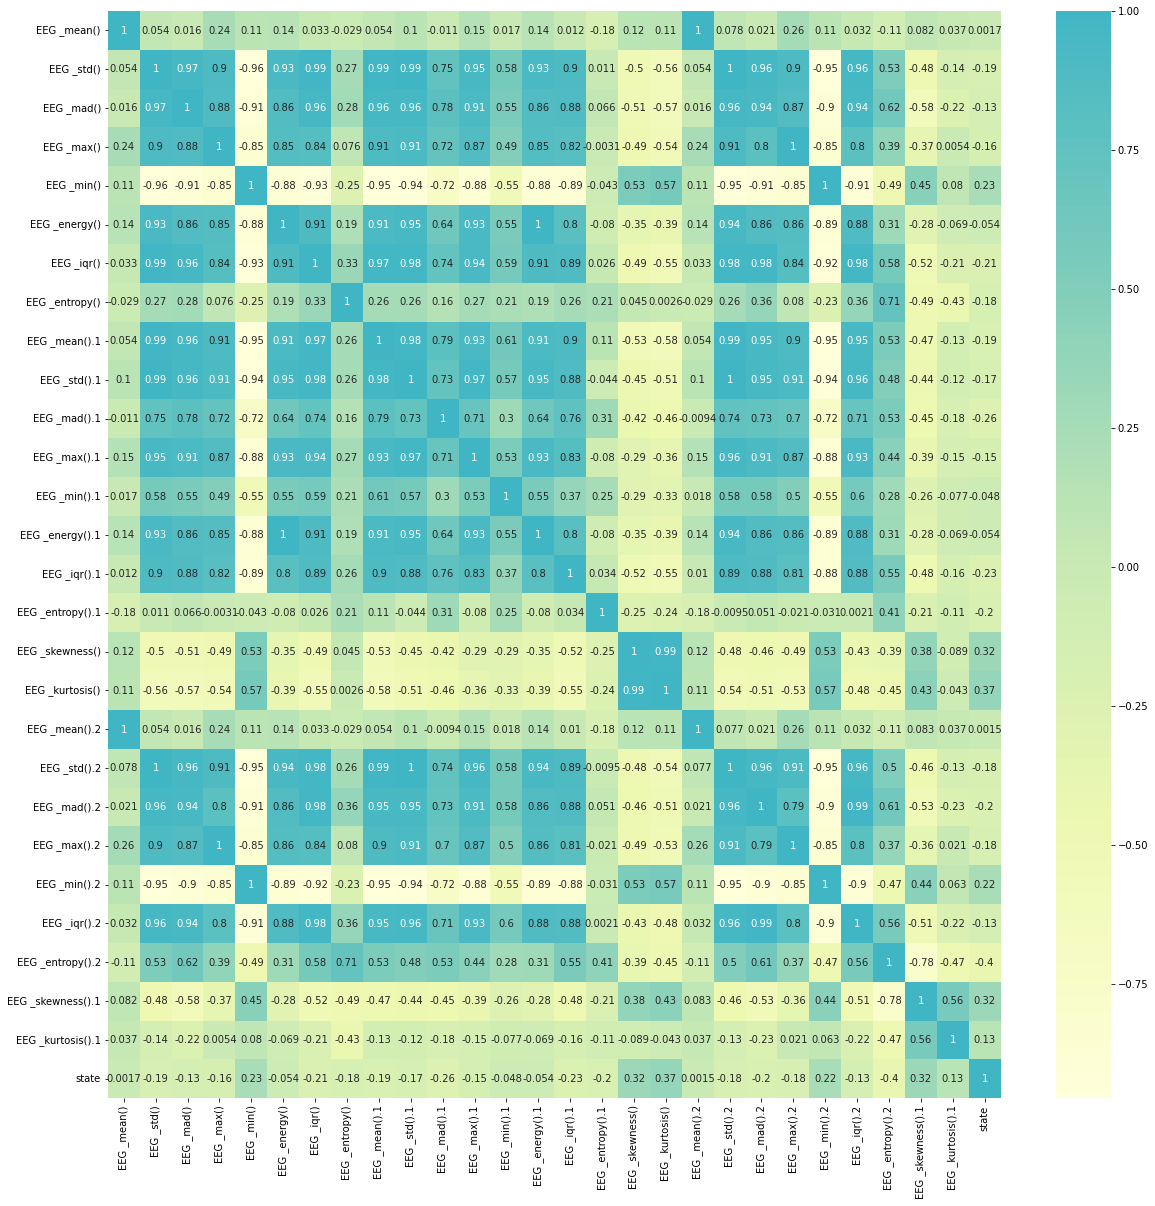

In [4]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap="YlGnBu",center=True , robust=False, annot=True)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Count of Each Class')

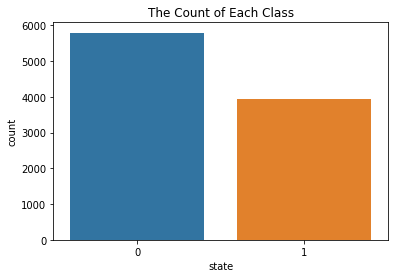

In [5]:
sns.countplot(df['state'])
plt.title("The Count of Each Class")

As it can be infered from the above chart, the data is biased towards one class,`class 0` So, the model should be evaluated using the F Score. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EEG _mean()        9742 non-null   float64
 1   EEG _std()         9742 non-null   float64
 2   EEG _mad()         9742 non-null   float64
 3   EEG _max()         9742 non-null   int64  
 4   EEG _min()         9742 non-null   int64  
 5   EEG _energy()      9742 non-null   int64  
 6   EEG _iqr()         9742 non-null   float64
 7   EEG _entropy()     9742 non-null   float64
 8   EEG _mean().1      9742 non-null   float64
 9   EEG _std().1       9742 non-null   float64
 10  EEG _mad().1       9742 non-null   float64
 11  EEG _max().1       9742 non-null   float64
 12  EEG _min().1       9742 non-null   float64
 13  EEG _energy().1    9742 non-null   float64
 14  EEG _iqr().1       9742 non-null   float64
 15  EEG _entropy().1   9742 non-null   float64
 16  EEG _skewness()    9742 

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print('The X data has a length of {}'.format(len(x)))
print('The Y target has a length of {}'.format(len(y)))
print('Perfect!')

The X data has a length of 9742
The Y target has a length of 9742
Perfect!


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test_vald,y_train,y_test_vald=train_test_split(x,y,test_size=0.4)
x_vald,x_test,y_vald,y_test=train_test_split(x,y,test_size=0.5)
print('The X_training has a length of {}'.format(len(x_train)))
print('The X_vald has a length of {}'.format(len(x_vald)))
print('The y_vald has a length of {}'.format(len(y_vald)))
print('The X_test has a length of {}'.format(len(x_test)))
print('The Y_training has a length of {}'.format(len(y_train)))
print('The Y_test has a length of {}'.format(len(y_test)))
print('Perfect!')

The X_training has a length of 5845
The X_vald has a length of 4871
The y_vald has a length of 4871
The X_test has a length of 4871
The Y_training has a length of 5845
The Y_test has a length of 4871
Perfect!


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
scaler.transform(x_vald)
scaler.transform(x_test)

array([[-6.14370903e-01, -1.41703854e+00, -1.55027236e+00, ...,
        -2.67898048e+00,  3.45342616e+00,  3.10847488e+00],
       [ 6.49131867e-01,  9.76449551e-01,  4.47212206e-01, ...,
         4.45351214e-01, -2.09052427e-01, -3.90052766e-02],
       [-1.25933825e+00, -1.41430983e+00, -1.54256006e+00, ...,
        -2.03764328e+00,  1.76893994e+00,  2.68900286e+00],
       ...,
       [ 1.97270515e-01, -7.25968637e-01, -7.28912874e-01, ...,
        -1.45103793e+00, -3.14195911e-01, -1.65392961e-01],
       [ 3.66013392e-01, -2.41111876e-01, -4.63747130e-02, ...,
         3.76757691e-01, -3.21325402e-03, -5.00005502e-01],
       [-8.46015349e-02,  6.09351475e-01,  4.97342127e-01, ...,
         5.06667947e-01, -2.63409475e-01, -3.38354813e-02]])

## Hyperparameters Tuning 

In [10]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
scorer = make_scorer(f1_score)
parameters = {'C':[1, 10]}
svm=SVC()
grid = GridSearchCV(estimator=svm,param_grid=parameters,scoring=scorer) 

In [11]:
grid

GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10]},
             scoring=make_scorer(f1_score))

In [12]:
grid_fit=grid.fit(x_train,y_train)


In [13]:
best=grid_fit.best_estimator_
best

SVC(C=10)

In [14]:
yhat=best.predict(x_vald)

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_vald,yhat))

0.92321905152946


In [16]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(x_train,y_train)
yrf=rf.predict(x_vald)
print(accuracy_score(y_vald,yrf))

0.9979470334633546


In [17]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
yada=ada.predict(x_vald)
print(accuracy_score(y_vald,yada))


0.9981523301170191


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
yknn=knn.predict(x_vald)
print(accuracy_score(y_vald,yknn))


0.9244508314514474


In [19]:
results=pd.DataFrame({"Classifier":['SVM','RF','ADA','KNN'],"Accuracy":[accuracy_score(y_vald,yhat),accuracy_score(y_vald,yrf),accuracy_score(y_vald,yada),accuracy_score(y_vald,yknn)]
                     ,"f1_score":[f1_score(y_vald,yhat),f1_score(y_vald,yrf),f1_score(y_vald,yada),f1_score(y_vald,yknn)]})
results

,Classifier,Accuracy,f1_score
0,SVM,0.923219,0.907745
1,RF,0.997947,0.997429
2,ADA,0.998152,0.997687
3,KNN,0.924451,0.908184


Text(0.5, 0.98, 'The Results of on the Validation data ')

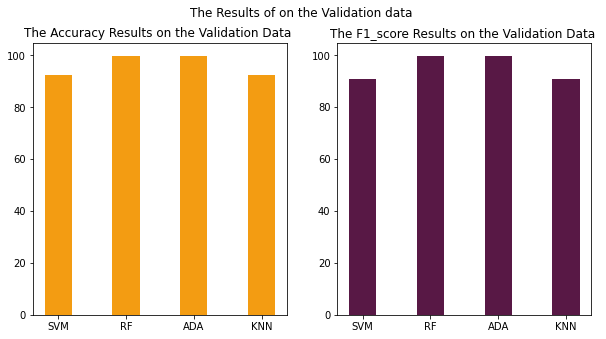

In [20]:
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.bar(x=results['Classifier'],height=results['Accuracy']*100,width=0.4,color="#F39C12");
plt.title("The Accuracy Results on the Validation Data ")
plt.subplot(1,2,2);
plt.bar(x=results['Classifier'],height=results['f1_score']*100,width=0.4,color="#581845");
plt.title("The F1_score Results on the Validation Data ")
plt.suptitle("The Results of on the Validation data ")

The confusion Matrix of The Performance of the classifieres on the Validation data


Text(0.5, 1.0, 'The confusion Matrix of KNN')

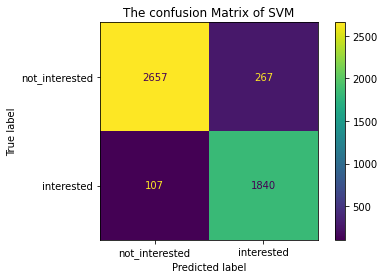

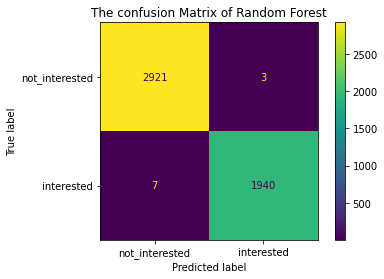

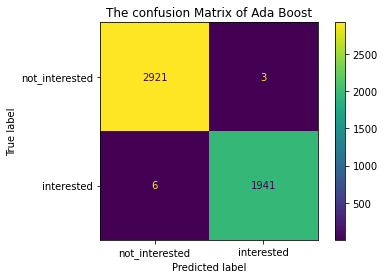

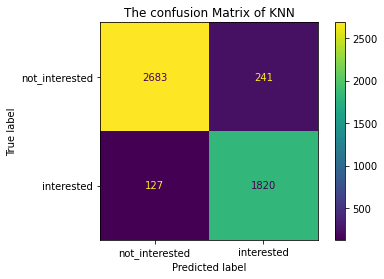

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print("The confusion Matrix of The Performance of the classifieres on the Validation data")
cm1=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_vald,yhat),display_labels=['not_interested','interested'])
cm1.plot()
plt.title("The confusion Matrix of SVM")
cm2=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_vald,yrf),display_labels=['not_interested','interested'])
cm2.plot()
plt.title("The confusion Matrix of Random Forest")
cm3=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_vald,yada),display_labels=['not_interested','interested'])
cm3.plot()
plt.title("The confusion Matrix of Ada Boost")
cm4=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_vald,yknn),display_labels=['not_interested','interested'])
cm4.plot()
plt.title("The confusion Matrix of KNN")

## The Performance on the test set 


In [22]:
yhat1=best.predict(x_test)
yrf1=rf.predict(x_test)
yada1=ada.predict(x_test)
yknn1=knn.predict(x_test)

In [23]:
results1=pd.DataFrame({"Classifier":['SVM','RF','ADA','KNN'],"Accuracy_test":[accuracy_score(y_test,yhat1),accuracy_score(y_test,yrf1),accuracy_score(y_test,yada1),accuracy_score(y_test,yknn1)]
                     ,"f1_score_test":[f1_score(y_test,yhat1),f1_score(y_test,yrf1),f1_score(y_test,yada1),f1_score(y_test,yknn1)]})
results1

,Classifier,Accuracy_test,f1_score_test
0,SVM,0.913365,0.897672
1,RF,0.999179,0.998998
2,ADA,0.999589,0.999499
3,KNN,0.925477,0.911442


The confusion Matrix of The Performance of the classifieres on the test data


Text(0.5, 1.0, 'The confusion Matrix of KNN')

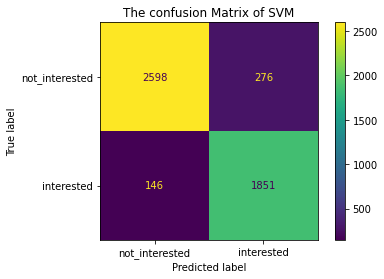

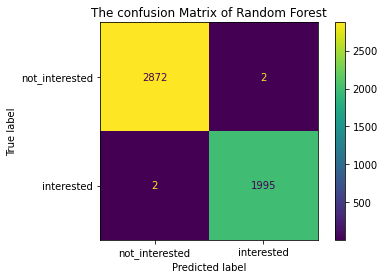

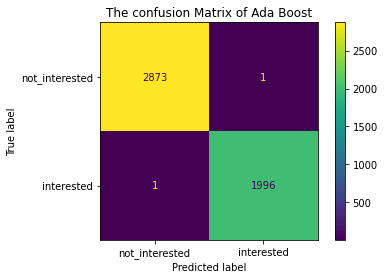

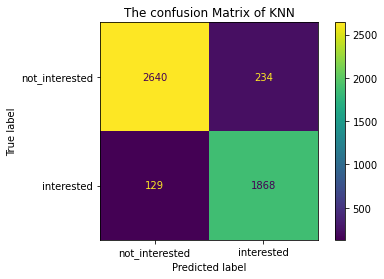

In [24]:
print("The confusion Matrix of The Performance of the classifieres on the test data")
cm1=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yhat1),display_labels=['not_interested','interested'])
cm1.plot()
plt.title("The confusion Matrix of SVM")
cm2=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yrf1),display_labels=['not_interested','interested'])
cm2.plot()
plt.title("The confusion Matrix of Random Forest")
cm3=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yada1),display_labels=['not_interested','interested'])
cm3.plot()
plt.title("The confusion Matrix of Ada Boost")
cm4=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,yknn1),display_labels=['not_interested','interested'])
cm4.plot()
plt.title("The confusion Matrix of KNN")

## Model Selection
Based on the Model Performance on both the validation and test set, the svm and knn did not perform well in terms of accuracy and f1_score. On the other hand, the results of the adaboost and random forest were significantly high on both but according to the confusion matrix, the random forest miscalssified points on the two classes were less than those of the adaboost which makes it the final model that will be used in building the system.